# Лабораторна робота 2

## Завдання 3
### Отримайте імена стовпців набору даних

In [4]:
import pandas as pd
import matplotlib.pyplot as mpl
DataFrame = pd.read_csv("NationalNames.csv")
DataFrameIndex = DataFrame.columns
print(DataFrameIndex)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


## Завдання 4
### Отримайте загальну інформацію про дані у наборі даних

In [6]:
DataFrameDescribe = DataFrame.describe()
print(DataFrameDescribe)

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


## Завдання 5
### Знайдіть кількість унікальних імен у наборі даних

In [8]:
DataFrameUniqueYear = DataFrame['Name'].nunique()
print(DataFrameUniqueYear)

93889


## Завдання 8
### Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

In [10]:
DataFrameUniqueYear = DataFrame[DataFrame['Year'] == 1947]
DataFrameUniqueName = DataFrameUniqueYear['Name'].value_counts()
DataFrameUniquePopularName = DataFrameUniqueName.idxmax()
print(DataFrameUniquePopularName)

Linda


## Завдання 9
### Підрахуйте кількість записів, для яких Count  - мінімальне у наборі

In [12]:
minCount = DataFrame['Count'].min()
minCountRecords = DataFrame[DataFrame['Count'] == minCount].shape[0]
print(minCountRecords)

254615


## Завдання 11
### Знайдіть рік із найбільшою кількістю унікальних імен

In [14]:
uniqueNameCount = DataFrame.groupby('Year')['Name'].nunique()
yearWithMostUniqueNames = uniqueNameCount.idxmax()
maxUniqueNameCount = uniqueNameCount.max()
print(F"Year {yearWithMostUniqueNames} Name {maxUniqueNameCount}")

Year 2008 Name 32488


## Завдання 12
### Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [16]:
uniqueNameCount = DataFrame.groupby('Year')['Name'].nunique()
yearWithMostUniqueNames = uniqueNameCount.idxmax()
FilterDataByYear = DataFrame[DataFrame['Year'] == yearWithMostUniqueNames]
PopularName = FilterDataByYear.groupby('Name')['Count'].sum()
mostPopularName = PopularName.idxmax()
print(mostPopularName)

Jacob


## Завдання 13
### Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [18]:
jacobFem = DataFrame[(DataFrame['Name'] == 'Jacob') & (DataFrame['Gender'] == 'F')]
yearMostPopularJacobFem = jacobFem.loc[jacobFem['Count'].idxmax(), 'Year']
print(f"Year, when name 'Jacob' was the most popular among female names: {yearMostPopularJacobFem}")

Year, when name 'Jacob' was the most popular among female names: 2004


## Завдання 14
### Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [20]:
gender_neutral_names = DataFrame.groupby('Name')['Gender'].unique()
gender_neutral_names = gender_neutral_names[gender_neutral_names.apply(lambda x: len(x) == 2)]
genderNeutralIDf = DataFrame[DataFrame['Name'].isin(gender_neutral_names.index)]
countByYear = genderNeutralIDf['Year'].value_counts()
maxYear = countByYear.idxmax()
maxCount = countByYear.max()
print(f"Year with the most gender-neutral names: {maxYear} (Amount: {maxCount})")

Year with the most gender-neutral names: 2008 (Amount: 9914)


## Завдання 16
### Знайдіть рік, коли народилося найбільше дітей

In [22]:
totalByYear = DataFrame.groupby('Year')['Count'].sum()
maxYear = totalByYear.idxmax()
print(f"Year with the highest number of children born: {maxYear}")

Year with the highest number of children born: 1957


## Завдання 17
### Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [24]:
gender_count_by_year = DataFrame.groupby(['Year', 'Gender'])['Count'].sum().unstack()
gender_count_by_year.columns = ['M', 'F']
print(gender_count_by_year)

            M        F
Year                  
1880    90993   110491
1881    91954   100745
1882   107850   113688
1883   112321   104629
1884   129022   114445
...       ...      ...
2010  1772738  1913851
2011  1753500  1893230
2012  1753922  1889414
2013  1745339  1881463
2014  1768775  1901376

[135 rows x 2 columns]


## Завдання 18
### Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків

In [26]:
genderCountByYear = DataFrame.groupby(['Year', 'Gender'])['Count'].sum().unstack()
yearsWithMoreGirls = (genderCountByYear['F'] > genderCountByYear['M']).sum()
print(yearsWithMoreGirls)

54


## Завдання 19
### Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік

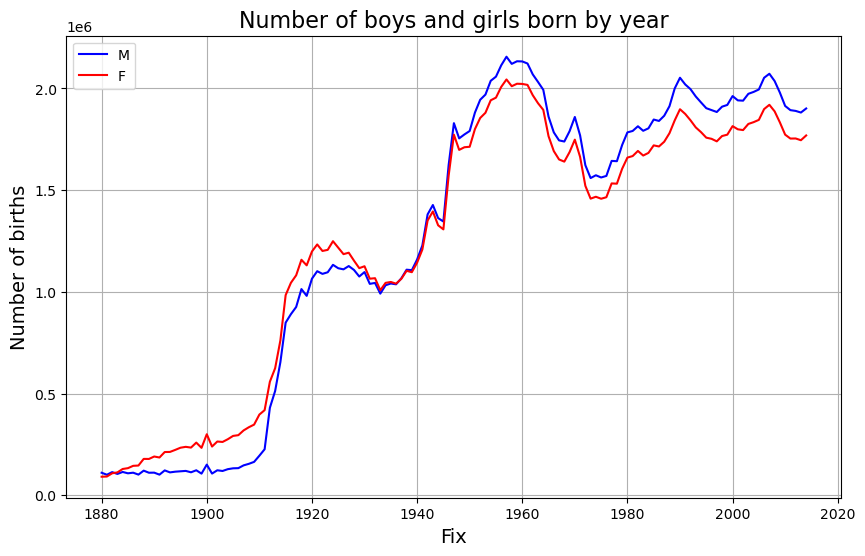

In [30]:
total_births_by_year = DataFrame.groupby('Year')['Count'].sum()
gender_count_by_year = DataFrame.groupby(['Year', 'Gender'])['Count'].sum().unstack()
mpl.figure(figsize=(10, 6))
mpl.plot(gender_count_by_year.index, gender_count_by_year['M'], linestyle='-', color='b', label='M')
mpl.plot(gender_count_by_year.index, gender_count_by_year['F'], linestyle='-', color='r', label='F')
mpl.xlabel('Fix', fontsize=14)
mpl.ylabel('Number of births', fontsize=14)
mpl.title('Number of boys and girls born by year', fontsize=16)
mpl.grid(True)
mpl.legend()

## Завдання 20
### Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

In [28]:
nameGenderCount = DataFrame.groupby(['Name', 'Gender']).size().unstack(fill_value=0)
genderNeutralNames = nameGenderCount[(nameGenderCount['M'] > 0) & (nameGenderCount['F'] > 0)]
genderNeutralCount = genderNeutralNames.shape[0]
print(genderNeutralCount)

10221


## Завдання 22
### Підрахуйте скільки років проводилось спостереження

In [32]:
SpectatorYears = DataFrame['Year'].max() - DataFrame['Year'].min() + 1
print(SpectatorYears)

135


## Завдання 23
### Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [34]:
names = DataFrame['Name'].tolist()
nameCount = DataFrame['Name'].value_counts()
print(nameCount.head(15))

Name
William    270
Robert     270
Ollie      270
Marion     270
Jesse      270
Leslie     270
Johnnie    270
Tommie     270
Joseph     270
Jessie     270
Francis    270
Jean       270
Lee        270
Sidney     270
John       270
Name: count, dtype: int64


## Завдання 24
### Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

In [42]:
nameCount = DataFrame.groupby('Name')['Count'].sum().reset_index()
popularity_threshold = 161
unpopular_names = nameCount[nameCount['Count'] < popularity_threshold]
most_popular_unpopular_name = unpopular_names.loc[unpopular_names['Count'].idxmax()]
print(f"The most popular name among unpopular names is {most_popular_unpopular_name['Name']}")
print(f"Number of people with this name {most_popular_unpopular_name['Count']}")

The most popular name among unpopular names is Adriyana
Number of people with this name 160


## Завдання 27
### Знайти найпопулярніші імена в кожному році

In [45]:
most_popular_names = DataFrame.loc[DataFrame.groupby('Year')['Count'].idxmax()]
print(most_popular_names)

              Id      Name  Year Gender  Count
942          943      John  1880      M   9655
2938        2939      John  1881      M   8769
4963        4964      John  1882      M   9557
7116        7117      John  1883      M   8894
9318        9319      John  1884      M   9388
...          ...       ...   ...    ...    ...
1657592  1657593  Isabella  2010      F  22883
1691633  1691634    Sophia  2011      F  21816
1725502  1725503    Sophia  2012      F  22267
1759186  1759187    Sophia  2013      F  21147
1792389  1792390      Emma  2014      F  20799

[135 rows x 5 columns]
